In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter

#### access the file by changing default file path

In [2]:
os.chdir('C:/Users/sabbi/OneDrive/Desktop/dataset')

In [3]:
os.listdir()

['age_data.txt',
 'barh_database.png',
 'barh_programming_lang.png',
 'lan_data.csv',
 'modified.xlsx',
 'modified_json.json',
 'modified_time_series.csv',
 'pie_charts_programming_lang.jpg',
 'pie_database.png',
 'README_2021.txt',
 'salary_data.txt',
 'so_survey_2021.pdf',
 'stack-overflow-developer-survey-2021.zip',
 'survey_results_public.csv',
 'survey_results_schema.csv',
 'time_data.txt',
 'time_data_csv.csv',
 'youtube_data.txt']

#### Create dataframe from 2021 stack overflow developer survey data

In [4]:
df = pd.read_csv('survey_results_public.csv')

In [5]:
pd.set_option('display.max_columns', 47)
pd.set_option('display.max_rows', 50)

In [6]:
df.set_index('ResponseId', inplace = True)  # sets first column (ResponseId) as index 

In [7]:
df.columns = [x.lower() for x in df.columns] # convert columns name to lowercase

In [8]:
df.columns

Index(['mainbranch', 'employment', 'country', 'us_state', 'uk_country',
       'edlevel', 'age1stcode', 'learncode', 'yearscode', 'yearscodepro',
       'devtype', 'orgsize', 'currency', 'comptotal', 'compfreq',
       'languagehaveworkedwith', 'languagewanttoworkwith',
       'databasehaveworkedwith', 'databasewanttoworkwith',
       'platformhaveworkedwith', 'platformwanttoworkwith',
       'webframehaveworkedwith', 'webframewanttoworkwith',
       'misctechhaveworkedwith', 'misctechwanttoworkwith',
       'toolstechhaveworkedwith', 'toolstechwanttoworkwith',
       'newcollabtoolshaveworkedwith', 'newcollabtoolswanttoworkwith', 'opsys',
       'newstuck', 'newsosites', 'sovisitfreq', 'soaccount', 'sopartfreq',
       'socomm', 'newothercomms', 'age', 'gender', 'trans', 'sexuality',
       'ethnicity', 'accessibility', 'mentalhealth', 'surveylength',
       'surveyease', 'convertedcompyearly'],
      dtype='object')

In [9]:
df.shape

(83439, 47)

In [10]:
df['country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: country, Length: 181, dtype: int64

In [11]:
### Separate Bangladesh developers data from main data

In [12]:
country_grp = df.groupby('country')

In [13]:
BD_df = country_grp.get_group('Bangladesh')

In [14]:
BD_df.shape

(704, 47)

In [15]:
BD_df.head(20)

,mainbranch,employment,country,us_state,uk_country,edlevel,age1stcode,learncode,yearscode,yearscodepro,devtype,orgsize,currency,comptotal,compfreq,languagehaveworkedwith,languagewanttoworkwith,databasehaveworkedwith,databasewanttoworkwith,platformhaveworkedwith,platformwanttoworkwith,webframehaveworkedwith,webframewanttoworkwith,misctechhaveworkedwith,misctechwanttoworkwith,toolstechhaveworkedwith,toolstechwanttoworkwith,newcollabtoolshaveworkedwith,newcollabtoolswanttoworkwith,opsys,newstuck,newsosites,sovisitfreq,soaccount,sopartfreq,socomm,newothercomms,age,gender,trans,sexuality,ethnicity,accessibility,mentalhealth,surveylength,surveyease,convertedcompyearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,I am a developer by profession,Employed full-time,Bangladesh,NaN,NaN,Some college/university study without earning ...,5 - 10 years,"Other online resources (ex: videos, blogs, etc...",6,4,"Developer, mobile;Developer, front-end;Develop...",20 to 99 employees,BDT\tBangladeshi taka,100000.0,Monthly,C;C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Python,Go;Kotlin;Node.js;R;Ruby;TypeScript,Firebase;MongoDB;MySQL;Redis;SQLite,MariaDB;PostgreSQL,AWS;DigitalOcean;Heroku,Google Cloud Platform;Microsoft Azure,jQuery;Laravel;React.js;Symfony;Vue.js,Django;Express;FastAPI;Gatsby;Ruby on Rails,Flutter,React Native;TensorFlow,Git;Kubernetes;Xamarin;Yarn,Docker,Android Studio;Atom;Eclipse;IntelliJ;NetBeans;...,Xcode,Linux-based,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange;Stack Overflow f...,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",Yes,18-24 years old,Man,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,14124.0
230,I am a developer by profession,Employed full-time,Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School,6,3,"Developer, back-end",2 to 9 employees,BDT\tBangladeshi taka,NaN,Monthly,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL,Elixir;Erlang;Java;JavaScript;PHP;SQL,MySQL;PostgreSQL;SQLite,MySQL;PostgreSQL;SQLite,AWS,AWS,jQuery;Laravel;React.js,jQuery;Laravel;React.js,NaN,NaN,Ansible;Docker;Git,Ansible;Docker;Git;Kubernetes,Sublime Text;Visual Studio Code,Sublime Text;Visual Studio Code,Linux-based,Visit Stack Overflow;Google it;Meditate,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Less than once per month or monthly,"Yes, somewhat",No,25-34 years old,Man,No,Prefer not to say,Prefer not to say,Prefer not to say,None of the above,Too long,Easy,NaN
244,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",7,7,"Developer, full-stack",10 to 19 employees,USD\tUnited States dollar,4000.0,Monthly,C#;C++,C#;C++,Microsoft SQL Server;MongoDB;PostgreSQL;Redis,Microsoft SQL Server;MongoDB;PostgreSQL;Redis,Google Cloud Platform;Microsoft Azure,AWS;Google Cloud Platform;Microsoft Azure,Angular;ASP.NET;ASP.NET Core,Angular;ASP.NET;ASP.NET Core,.NET Framework;.NET Core / .NET 5,.NET Framework;.NET Core / .NET 5,Docker,Docker,Visual Studio,Visual Studio,Windows,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",Yes,25-34 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,48000.0
249,I am a student who is learning to code,Employed part-time,Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,NaN,"Developer, back-end",NaN,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;Matlab;Perl;Pyt...,C;C++;Java;LISP;Perl;PHP;Python;SQL,MongoDB;MySQL;PostgreSQL;SQLite,MariaDB;MongoDB;PostgreSQL,DigitalOcean;Heroku;IBM Cloud or Watson,AWS;IBM Cloud or Watson,Djang

# Finding popular programming language in BD according to stack overflow survey data

In [16]:
new_df = BD_df.loc[:, ['languagehaveworkedwith']]

In [17]:
new_df.shape

(704, 1)

In [18]:
new_df.head()

,languagehaveworkedwith
ResponseId,
123,C;C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Python
230,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL
244,C#;C++
249,C;C++;HTML/CSS;Java;JavaScript;Matlab;Perl;Pyt...
351,C;C++;PHP;Python


In [19]:
new_df.dropna(inplace = True) #droping rows that contain null value

In [20]:
new_df.shape # Dropped almost 17 rows

(687, 1)

In [21]:
languages = new_df['languagehaveworkedwith']

In [22]:
type(languages)

pandas.core.series.Series

In [23]:
languages.head()

ResponseId
123    C;C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Python
230            C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL
244                                               C#;C++
249    C;C++;HTML/CSS;Java;JavaScript;Matlab;Perl;Pyt...
351                                     C;C++;PHP;Python
Name: languagehaveworkedwith, dtype: object

In [24]:
# Count programming languages that is used by most devs

In [25]:
lan_count = Counter()

In [26]:
for row in languages:
    lan_count.update(row.split(';'))

In [27]:
lan_count.most_common(15)

[('JavaScript', 504),
 ('HTML/CSS', 440),
 ('Python', 322),
 ('SQL', 307),
 ('Java', 252),
 ('PHP', 248),
 ('Node.js', 242),
 ('C', 239),
 ('C++', 209),
 ('TypeScript', 153),
 ('C#', 122),
 ('Bash/Shell', 90),
 ('Dart', 70),
 ('Kotlin', 51),
 ('Assembly', 45)]

In [28]:
language = []
users = []

for x in lan_count.most_common(15):
    language.append(x[0])
    users.append(x[1])

In [29]:
language

['JavaScript',
 'HTML/CSS',
 'Python',
 'SQL',
 'Java',
 'PHP',
 'Node.js',
 'C',
 'C++',
 'TypeScript',
 'C#',
 'Bash/Shell',
 'Dart',
 'Kotlin',
 'Assembly']

In [30]:
users

[504, 440, 322, 307, 252, 248, 242, 239, 209, 153, 122, 90, 70, 51, 45]

### visualizing Data

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

## barh 

In [32]:
language.reverse()
users.reverse()

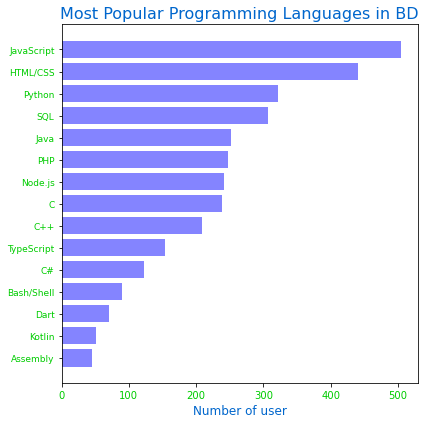

In [33]:
plt.figure(figsize=(6, 6))

plt.barh(language, users, color='#6666ff', alpha = 0.8)

plt.title('Most Popular Programming Languages in BD', color='#0066cc', fontsize= 16)
plt.xlabel('Number of user', color='#0066cc', fontsize = 12)

plt.yticks(color='#00cc00', fontsize = 9)
plt.xticks(color='#00cc00', fontsize = 10)

plt.savefig('barh_programming_lang.png')

plt.grid(False)
plt.tight_layout()
plt.show()

## pie charts

In [34]:
# Extract top 10 language for pie charts
language = []
users = []

for x in lan_count.most_common(10):
    language.append(x[0])
    users.append(x[1])

In [35]:
print(language)
print(users)

['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'Java', 'PHP', 'Node.js', 'C', 'C++', 'TypeScript']
[504, 440, 322, 307, 252, 248, 242, 239, 209, 153]


In [36]:
slices = users
labels = language
explode = [0.1,0,0,0,0,0,0,0,0,0]

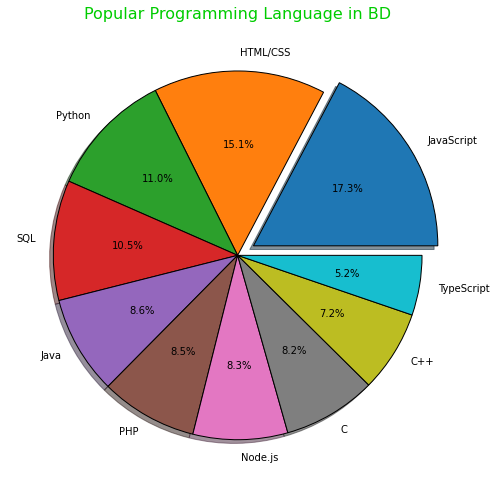

In [37]:
plt.figure(figsize=(7,7))

plt.pie(slices,labels = labels, explode =explode,  shadow = True, wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')

plt.title("Popular Programming Language in BD", color = '#00cc00', fontsize = 16)
plt.tight_layout()
plt.savefig('pie_charts_programming_lang.jpg')
plt.show()

# Most popular Database in BD according to stack overflow survey data

In [38]:
# main BD data
BD_df.head()

,mainbranch,employment,country,us_state,uk_country,edlevel,age1stcode,learncode,yearscode,yearscodepro,devtype,orgsize,currency,comptotal,compfreq,languagehaveworkedwith,languagewanttoworkwith,databasehaveworkedwith,databasewanttoworkwith,platformhaveworkedwith,platformwanttoworkwith,webframehaveworkedwith,webframewanttoworkwith,misctechhaveworkedwith,misctechwanttoworkwith,toolstechhaveworkedwith,toolstechwanttoworkwith,newcollabtoolshaveworkedwith,newcollabtoolswanttoworkwith,opsys,newstuck,newsosites,sovisitfreq,soaccount,sopartfreq,socomm,newothercomms,age,gender,trans,sexuality,ethnicity,accessibility,mentalhealth,surveylength,surveyease,convertedcompyearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,I am a developer by profession,Employed full-time,Bangladesh,NaN,NaN,Some college/university study without earning ...,5 - 10 years,"Other online resources (ex: videos, blogs, etc...",6,4,"Developer, mobile;Developer, front-end;Develop...",20 to 99 employees,BDT\tBangladeshi taka,100000.0,Monthly,C;C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Python,Go;Kotlin;Node.js;R;Ruby;TypeScript,Firebase;MongoDB;MySQL;Redis;SQLite,MariaDB;PostgreSQL,AWS;DigitalOcean;Heroku,Google Cloud Platform;Microsoft Azure,jQuery;Laravel;React.js;Symfony;Vue.js,Django;Express;FastAPI;Gatsby;Ruby on Rails,Flutter,React Native;TensorFlow,Git;Kubernetes;Xamarin;Yarn,Docker,Android Studio;Atom;Eclipse;IntelliJ;NetBeans;...,Xcode,Linux-based,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange;Stack Overflow f...,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",Yes,18-24 years old,Man,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,14124.0
230,I am a developer by profession,Employed full-time,Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School,6,3,"Developer, back-end",2 to 9 employees,BDT\tBangladeshi taka,NaN,Monthly,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL,Elixir;Erlang;Java;JavaScript;PHP;SQL,MySQL;PostgreSQL;SQLite,MySQL;PostgreSQL;SQLite,AWS,AWS,jQuery;Laravel;React.js,jQuery;Laravel;React.js,NaN,NaN,Ansible;Docker;Git,Ansible;Docker;Git;Kubernetes,Sublime Text;Visual Studio Code,Sublime Text;Visual Studio Code,Linux-based,Visit Stack Overflow;Google it;Meditate,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Less than once per month or monthly,"Yes, somewhat",No,25-34 years old,Man,No,Prefer not to say,Prefer not to say,Prefer not to say,None of the above,Too long,Easy,NaN
244,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",7,7,"Developer, full-stack",10 to 19 employees,USD\tUnited States dollar,4000.0,Monthly,C#;C++,C#;C++,Microsoft SQL Server;MongoDB;PostgreSQL;Redis,Microsoft SQL Server;MongoDB;PostgreSQL;Redis,Google Cloud Platform;Microsoft Azure,AWS;Google Cloud Platform;Microsoft Azure,Angular;ASP.NET;ASP.NET Core,Angular;ASP.NET;ASP.NET Core,.NET Framework;.NET Core / .NET 5,.NET Framework;.NET Core / .NET 5,Docker,Docker,Visual Studio,Visual Studio,Windows,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",Yes,25-34 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,48000.0
249,I am a student who is learning to code,Employed part-time,Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,NaN,"Developer, back-end",NaN,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;Matlab;Perl;Pyt...,C;C++;Java;LISP;Perl;PHP;Python;SQL,MongoDB;MySQL;PostgreSQL;SQLite,MariaDB;MongoDB;PostgreSQL,DigitalOcean;Heroku;IBM Cloud or Watson,AWS;IBM Cloud or Watson,Djang

In [39]:
new_data = BD_df.loc[:,['databasehaveworkedwith']]

In [40]:
new_data.shape

(704, 1)

In [41]:
new_data.dropna(inplace=True)

In [42]:
new_data.shape

(611, 1)

In [43]:
data_bases = new_data['databasehaveworkedwith']

In [44]:
lan_counter = Counter()

for row in data_bases:
    lan_counter.update(row.split(';'))

In [45]:
lan_counter.most_common(10)

[('MySQL', 434),
 ('SQLite', 220),
 ('MongoDB', 217),
 ('Firebase', 205),
 ('PostgreSQL', 188),
 ('MariaDB', 114),
 ('Microsoft SQL Server', 110),
 ('Redis', 95),
 ('Oracle', 93),
 ('Elasticsearch', 42)]

In [46]:
db_lang = []
users = []

for x in lan_counter.most_common(10):
    db_lang.append(x[0])
    users.append(x[1])

In [47]:
print(db_lang)
print(users)

['MySQL', 'SQLite', 'MongoDB', 'Firebase', 'PostgreSQL', 'MariaDB', 'Microsoft SQL Server', 'Redis', 'Oracle', 'Elasticsearch']
[434, 220, 217, 205, 188, 114, 110, 95, 93, 42]


In [48]:
db_lang.reverse()
users.reverse()

### Visualizing data

In [49]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

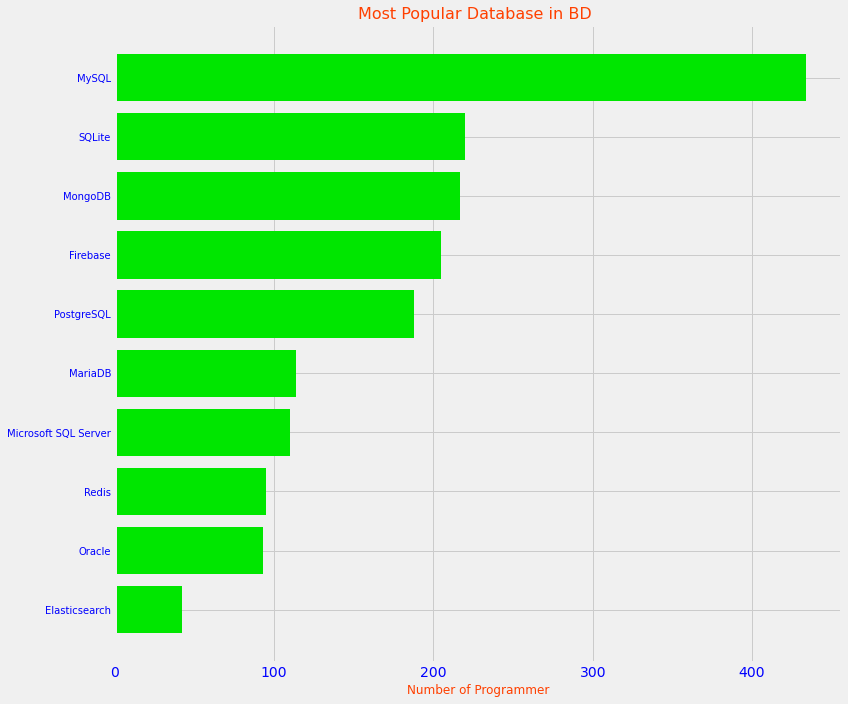

In [66]:
# histogram and barh

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,10))

plt.barh(db_lang, users, color = '#00e600')

plt.title('Most Popular Database in BD ', fontsize= 16, color = '#ff4000')
plt.xlabel('Number of Programmer', fontsize = 12, color = '#ff4000')

plt.yticks(color='#0000ff', fontsize = 10)
plt.xticks(color='#0000ff')

plt.savefig('barh_database.png')

plt.tight_layout()
plt.show()

### pie charts

In [59]:
slices = users
labels = db_lang
explode = [0,0,0,0,0,0,0,0,0,0.1]

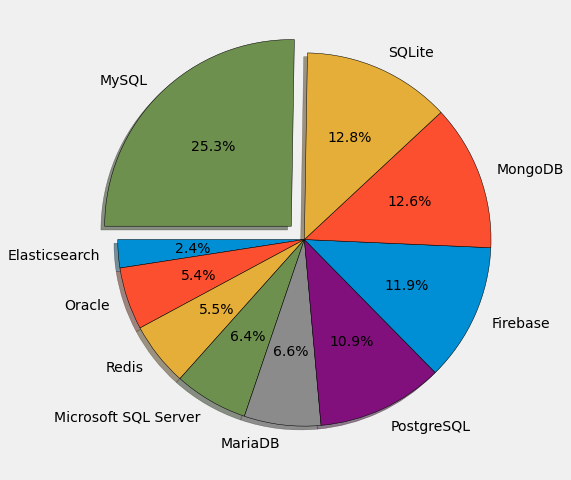

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.pie(slices, labels = labels,startangle= 180, shadow = True, explode = explode, wedgeprops = {'edgecolor':'black'}, autopct ='%1.1f%%')

plt.savefig('pie_database.png')
plt.show()